In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [38]:
names = open('names.txt').read().splitlines()
chars = sorted(list(set(''.join(names))))
stoi = {s: i + 1 for i, s in enumerate(chars)} # string to index
stoi['.'] = 0 # padding
itos = {i: s for s, i in stoi.items()} # index to string

In [39]:
# Block size and batch size
block_size = 3 # how many characters to predict
# Training and validation split
X = []
Y = []
for name in names:
    context = [0] * block_size # padding
    for ch in name + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # shift the context
# Convert to tensors
X = torch.tensor(X)
Y = torch.tensor(Y)

In [40]:
X.shape, Y.shape # (number of examples, block size), (number of examples,)

(torch.Size([228146, 3]), torch.Size([228146]))

In [41]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2),generator=g) # 27 characters, 2-dimensional embedding
# Initialize weights
W1 = torch.randn((2 * block_size, 100), generator=g) # 100 hidden units
W2 = torch.randn((100, 27), generator=g) # 27 characters
# Biases
b1 = torch.randn(100, generator=g) # 100 hidden units
b2 = torch.randn(27, generator=g) # 27 characters
# Parameters
parameters = [C, W1, W2, b1, b2]
# Learning rate
lr = 0.1
# Number of iterations
n = 1000
# Loss function
losses = []
# Training loop

In [42]:
sum(p.nelement() for p in parameters) # number of parameters

3481

In [43]:
for p in parameters:
    p.requires_grad = True # enable gradient tracking

In [44]:
Y.shape

torch.Size([228146])

In [45]:
# Training loop
for i in range(n):
    # Forward pass
    emb = C[X] # (number of examples, block size, embedding dimension)
    embcat = emb.view(-1, 2 * block_size) # (number of examples, 2 * block size)
    h = torch.tanh(embcat @ W1 + b1) # (number of examples, 100)
    logits = h @ W2 + b2 # (number of examples, 27)
    loss = F.cross_entropy(logits, Y) # (number of examples,)
    # print(loss.item())
    losses.append(loss.item())

    # Backward pass
    for p in parameters:
        p.grad = None # zero the gradients
    loss.backward() # compute gradients

    # Update weights
    for p in parameters:
        p.data -= lr * p.grad
    if i % 100 == 0:
        print(f"Iteration {i}, loss: {loss.item()}")
print(f"Final loss: {loss.item()}")

Iteration 0, loss: 18.29985237121582
Final loss: 2.663778781890869


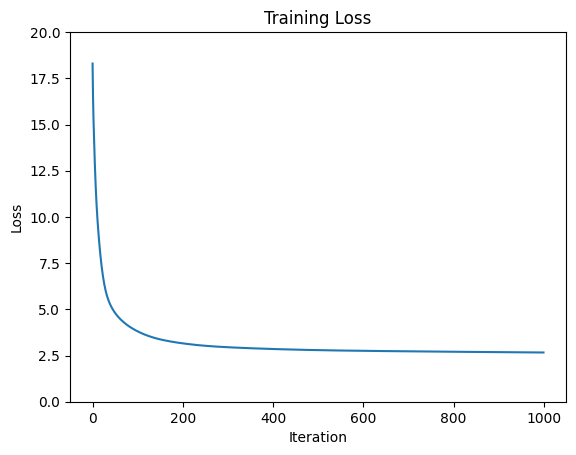

In [48]:
# Plot loss
plt.plot(losses)
plt.ylim(0, 20) # limit y-axis
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()